In [1]:
import sys 
sys.path.append('../fsp')
import monteCarloSimulation as mcs
import bapm_exact as be
import numpy as np
import math
import IPython.display as display


In [50]:
# 1A. Compute the $E[V_N], for a given probability$ 
# Test with example from notes. 
S0 = 4
K = 5
u = 2
d = 0.5
r = 0.25

exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, 1)

# Computes the expected value of V_n for a N, and probability.
V0 = exp.pathIndependentExpectedValue(1,exp.riskNeutralProbability())
display.Math(r"$ E[V_N] = " + str( V0[0]) + "$")

<IPython.core.display.Math object>

In [51]:
# 1B. Generate a replicating portfolio
# Test with example from notes.

S0 = 4
K = 5
u = 2
d = 0.5
r = 0.25

exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, 1)
VH = exp.V(S0*u)
VL = exp.V(S0*d)
V0, Deltas = exp.singleStepReplicatingPortfolio(VH, VL)
display.Math(r"$ E[V_N] = " + str( V0) + r"$ " + r", $ \Delta = " + str( Deltas) + r"$")

<IPython.core.display.Math object>

In [52]:
# 1C. Generate a MultiStep replicating portfolio
# Test with example from notes.

S0 = 4
K = 3
u = 2
d = 0.5
r = 0.25

exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, 2)
VH = exp.V(S0*u)
VL = exp.V(S0*d)
V0, Deltas = exp.recursiveReplicatingPortfolio(2)
print(Deltas)
# display.Math(r"$ E[V_N] = " + str( V0) + r"$ " + r", $ \Delta = " + str( Deltas) + r"$")
# The Deltas are stored in a binary tree, so the first element is the root, the second and third are the children of the root, the fourth and fifth are the children of the second, and so on.

VH  (array([1.]), 1) VL  (array([0.]), 1)
VH  (array([13.]), 1) VL  (array([1.]), 1)
VH  (5.6, 2.0) VL  (0.4, 0.16666666666666666)
[0.8666666666666666, 0.16666666666666666, 2.0]


The delta's are not path independent, the however, only depend on the previous time-steps, they are adapted to the filtration.

In [53]:
# 1D
S0 = 1
u = 1.1
d = 1.01
r = 0.05
N = 5
K = (1+r)**N * S0


exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, N)
p_tilda = exp.riskNeutralProbability()
V0 = exp.pathIndependentExpectedValue(N, p_tilda)
print("V0: ", V0[0], "SN: ", V0[1])

V0 = exp.pathIndependentExpectedValue(N, p_tilda - 0.2)
print("V0: ", V0[0], "SN: ", V0[1])

V0 = exp.pathIndependentExpectedValue(N, p_tilda + 0.2)
print("V0: ", V0[0], "SN: ", V0[1])

# 2D1: You are observing a risk premium, depending on if you are buying or selling the option.

V0 = exp.recursiveReplicatingPortfolio(N)
print("V0: ", V0[0], "Deltas (in a binary tree): ", V0[1])

# 2D2: There is no short selling, but you can borrow money at the risk free rate.



V0:  0.0390314752053499 SN:  0.9999999999999994
V0:  0.007690946873016782 SN:  0.9171745411267206
V0:  0.09934960622896158 SN:  1.0887038735338368
VH  (array([0.]), 1) VL  (array([0.]), 1)
VH  (array([0.]), 1) VL  (array([0.]), 1)
VH  (0.0, -0.0) VL  (0.0, -0.0)
VH  (array([0.]), 1) VL  (array([0.]), 1)
VH  (array([0.08147154]), 1) VL  (array([0.]), 1)
VH  (0.034485306878306934, 0.9052393055555562) VL  (0.0, -0.0)
VH  (0.01459695529240505, 0.3831700764256323) VL  (0.0, -0.0)
VH  (array([0.]), 1) VL  (array([0.]), 1)
VH  (array([0.08147154]), 1) VL  (array([0.]), 1)
VH  (0.034485306878306934, 0.9052393055555562) VL  (0.0, -0.0)
VH  (array([0.08147154]), 1) VL  (array([0.]), 1)
VH  (array([0.20245944]), 1) VL  (array([0.08147154]), 1)
VH  (0.12880375000000016, 1.3443099999999992) VL  (0.034485306878306934, 0.9052393055555562)
VH  (0.07276629993561219, 1.047982701352146) VL  (0.01459695529240505, 0.3831700764256323)
VH  (0.038523807005764445, 0.6463260515911898) VL  (0.006178605414774625,

Monte Carlo


In [54]:
# 2A

S0 = 1
u = 1.1
d = 1.01
r = 0.05
N = 5
K = (1+r)**N * S0


mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(654321))
p_tilda = mc.riskNeutralProbability()
print(p_tilda)

for m in [1,5,3,10,32, (2**21)-1]:
    S, V = mc.simulatePathDependent(1, 5, m, p_tilda)
    print("V0: ", np.mean(V), "SN: ", np.mean(S))



0.4444444444444444
V0:  0.15863226692973567 SN:  1.1586322669297358
V0:  0.012767016290733277 SN:  0.9622344351621079
V0:  0.04255672096911092 SN:  1.0348213974140208
V0:  0.07002750225814695 SN:  1.0573943569759905
V0:  0.027868133341952154 SN:  0.985575562337954
V0:  0.039005643049756455 SN:  0.9999490929210786


In [55]:
#2B

S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(22))
p_tilda = mc.riskNeutralProbability()

print(p_tilda)
S, V = mc.simulatePathDependent(S0, N, 32, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 256, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**10, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**11, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

0.18367346938773846
V0:  0.008193411816358243 SN:  1.0001938652984252
V0:  0.007334748959789231 SN:  1.0004136374652213
V0:  0.007711519742868852 SN:  1.0007865955585675
V0:  0.00772243298669084 SN:  1.0002057811767604
V0:  0.0075836484510681534 SN:  1.0000018188066009


In [56]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=5, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

import random
for SE in SA_10:
    for M in [2**4, 2**8, 2**16, 2**21]:
        mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
        mc.setRNG(np.random.seed(random.randint(0, 2**32)))
        mc.setOption(True, True, K, N)
        S, V = mc.simulatePathDependent(S0, N, M, p_tilda)
        print("M", M, " SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)


M 16  SA:  1.0059048618844324  V0:  0.011768543881957166  SN:  1.0059736172599938  S - SE:  6.875537556139122e-05
M 256  SA:  1.0059048618844324  V0:  0.01184374149065637  SN:  1.0070698195695273  S - SE:  0.0011649576850949472
M 65536  SA:  1.0059048618844324  V0:  0.010845246874054054  SN:  1.0059209170682781  S - SE:  1.6055183845731236e-05
M 2097152  SA:  1.0059048618844324  V0:  0.010835491911450487  SN:  1.0059052409752662  S - SE:  3.7909083383524944e-07
M 16  SA:  1.0059048618844324  V0:  0.015398395266678562  SN:  1.0133341804777118  S - SE:  0.007429318593279444
M 256  SA:  1.0059048618844324  V0:  0.010215256527294445  SN:  1.005806747587105  S - SE:  -9.811429732731192e-05
M 65536  SA:  1.0059048618844324  V0:  0.010893893171676204  SN:  1.005973456178265  S - SE:  6.859429383254678e-05
M 2097152  SA:  1.0059048618844324  V0:  0.01083126756773139  SN:  1.005899616948915  S - SE:  -5.244935517456639e-06
M 16  SA:  1.010833302863568  V0:  0.010812671294704286  SN:  1.00530602

In [57]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=1, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

S_samples = []

SE = SA_10
import random
for path in paths:
    for i in range(50):
        mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SA_10)
        mc.setRNG(np.random.seed(random.randint(0, 2**16)))
        mc.setOption(True, True, K, N)
        S, V = mc.simulatePathDependent(S0, N-10, 2**21, p_tilda)
        print("SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)
        S_samples.append(np.mean(S))

print("Mean: ", np.mean(S_samples), " Std: ", np.var(S_samples, ddof=1))


SA:  1.0157858907888069  V0:  0.01045073856760506  SN:  1.0157882679048766  S - SE:  2.3771160697627636e-06
SA:  1.0157858907888069  V0:  0.01046409419549689  SN:  1.0157955105378604  S - SE:  9.619749053557669e-06
SA:  1.0157858907888069  V0:  0.010447265740199529  SN:  1.0157789328096372  S - SE:  -6.957979169719408e-06
SA:  1.0157858907888069  V0:  0.010451882361774498  SN:  1.0157920007034071  S - SE:  6.10991460026078e-06
SA:  1.0157858907888069  V0:  0.010467346259771752  SN:  1.0157934088186769  S - SE:  7.5180298699795145e-06
SA:  1.0157858907888069  V0:  0.010439775517643841  SN:  1.0157775367326258  S - SE:  -8.354056181048009e-06
SA:  1.0157858907888069  V0:  0.010451473686869493  SN:  1.0157893118335364  S - SE:  3.4210447295013324e-06
SA:  1.0157858907888069  V0:  0.010460896537344463  SN:  1.0158029141631024  S - SE:  1.7023374295543903e-05
SA:  1.0157858907888069  V0:  0.010442781802287837  SN:  1.0157797215794795  S - SE:  -6.169209327389069e-06
SA:  1.0157858907888069 

(array([ 5.,  5.,  8., 10., 12.,  6.,  4.]),
 array([1.01575695, 1.01576526, 1.01577357, 1.01578188, 1.01579019,
        1.0157985 , 1.01580681, 1.01581512]),
 <BarContainer object of 7 artists>)

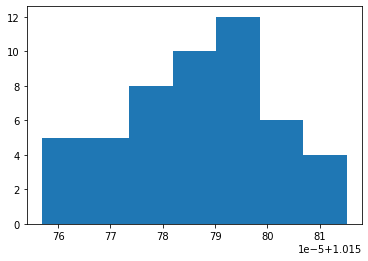

In [58]:
import matplotlib.pyplot as plt
plt.hist(S_samples, bins='auto')

this shows us a measure of how accurate our monte carlo approximation is, if we approximate the error as normal, we can determine a standard error region. 

In [59]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(22))
print(p_tilda)
S, V = mc.simulatePathDependent(S0, N, 32, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 256, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**10, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**11, p_tilda,  True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda,  True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

0.18367346938773846
V0:  0.015093250205418445 SN:  0.9989098852415869
V0:  0.013660541831645261 SN:  1.0004691725953179
V0:  0.013465099497953312 SN:  1.000542217274402
V0:  0.014427520369544183 SN:  0.9999496441983617
V0:  0.014191741620350199 SN:  1.000011926006375


In [5]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=5, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

import random
for SE in SA_10:
    mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
    mc.setRNG(np.random.seed(random.randint(0, 2**32)))
    mc.setOption(True, True, K, N)
    maxVal=-99999999999999
    stock = S0
    for t in range(10):
        stock = stock * (1 + u) if paths[0][t] == 1 else stock * (1 + d)
        maxVal = np.maximum(maxVal, stock * (1+r)**(10-t))

    for M in [2**4, 2**8, 2**16]:     
        S, V = mc.simulatePathDependent(S0, N, M, p_tilda, True, maxVal)    
        print(M, " SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S))


16  SA:  1.0059048618844324  V0:  929.2615419750534  SN:  1.0022019622354006
256  SA:  1.0059048618844324  V0:  929.2644896088457  SN:  0.9992543284433014
65536  SA:  1.0059048618844324  V0:  929.2637091223577  SN:  1.0000348149313492
16  SA:  1.0059048618844324  V0:  929.2671388319806  SN:  0.9966051053084064
256  SA:  1.0059048618844324  V0:  929.2626751499998  SN:  1.0010687872891268
65536  SA:  1.0059048618844324  V0:  929.2635707281943  SN:  1.0001732090946658
16  SA:  1.010833302863568  V0:  929.2714179346218  SN:  0.9923260026671739
256  SA:  1.010833302863568  V0:  929.264061308561  SN:  0.9996826287279308
65536  SA:  1.010833302863568  V0:  929.263846098211  SN:  0.9998978390779356
16  SA:  1.001000450120021  V0:  929.2630340011144  SN:  1.0007099361744776
256  SA:  1.001000450120021  V0:  929.2624601399331  SN:  1.001283797355905
65536  SA:  1.001000450120021  V0:  929.263674943505  SN:  1.0000689937840508
16  SA:  1.0059048618844324  V0:  929.2667288964899  SN:  0.9970150407

In [13]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=1, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

S_samples = []

import random
for SE in [SA_10]:
    for i in range(100):
        mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
        mc.setRNG(np.random.seed(random.randint(0, 2**16)))
        mc.setOption(True, True, K, N)
        maxVal=-99999999999999
        stock = S0
        for t in range(10):
            stock = stock * (1 + u) if paths[0][t] == 1 else stock * (1 + d)
            maxVal = np.maximum(maxVal, stock * (1+r)**(10-t))

        S, V = mc.simulatePathDependent(S0, N, 2**16, p_tilda, True, maxVal)
        S_samples.append(np.mean(S))

print("Mean: ", np.mean(S_samples), " Std: ", np.var(S_samples, ddof=1))


Mean:  0.9999975617397119  Std:  5.714280106262716e-09


(array([ 3.,  1.,  7., 13., 17., 21., 21., 13.,  2.,  2.]),
 array([0.99978297, 0.99982338, 0.99986379, 0.9999042 , 0.99994461,
        0.99998502, 1.00002543, 1.00006584, 1.00010625, 1.00014666,
        1.00018707]),
 <BarContainer object of 10 artists>)

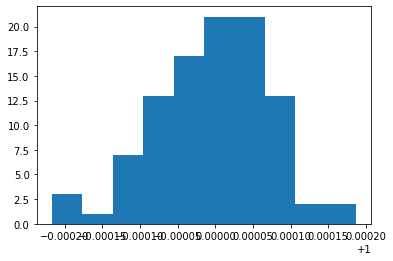

In [15]:
import matplotlib.pyplot as plt
plt.hist(S_samples, bins='auto')